In [1]:
## import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

### Crosstalk at different heights

In [46]:
fname = r'/data/new_trap/20200226/Bead1/TransFunc/TransFunc_X_'
bdfs_x = [BeadDataFile.BeadDataFile(fname+str(i)+'.h5') for i in range(1,13)]

fname = r'/data/new_trap/20200226/Bead1/TransFunc/TransFunc_Z_'
bdfs_z = [BeadDataFile.BeadDataFile(fname+str(i)+'.h5') for i in range(1,13)]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No heigh

<IPython.core.display.Javascript object>


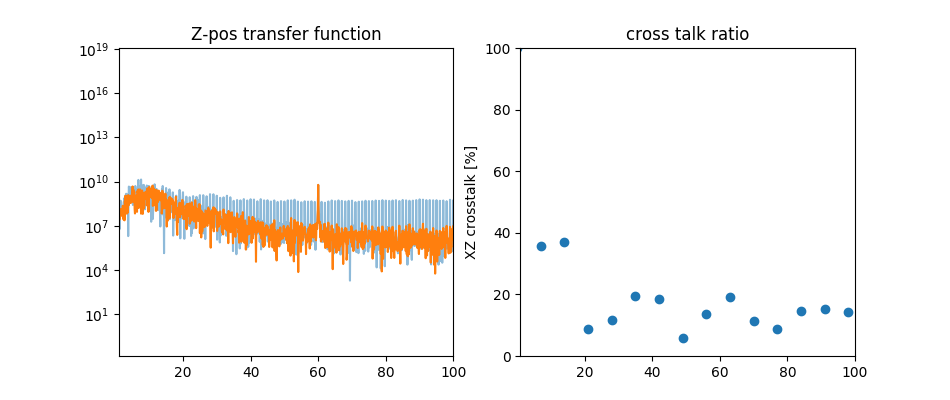

[(0, 100),
 Text(0, 0.5, 'XZ crosstalk [%]'),
 Text(0.5, 1.0, 'cross talk ratio')]

In [37]:
i = 8
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = bdfs_x[i].psd2('z')
freq, psd_tz = bdfs_z[i].psd2('z')
ax[0].semilogy(freq, psd_tz, alpha=0.5)
ax[0].semilogy(freq, psd_tx)

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%7==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,100),title='Z-pos transfer function')
ax[1].set(ylim=(0,100), title='cross talk ratio', ylabel='XZ crosstalk [%]')

In [50]:
pos_z = [248.964756  , 250.02138389, 252.78450627, 246.73280487,
       245.08637536, 255.36796953, 251.06947554, 255.26185517,
       253.76713088, 251.03174765, 249.70787072, 247.00756266]

<IPython.core.display.Javascript object>


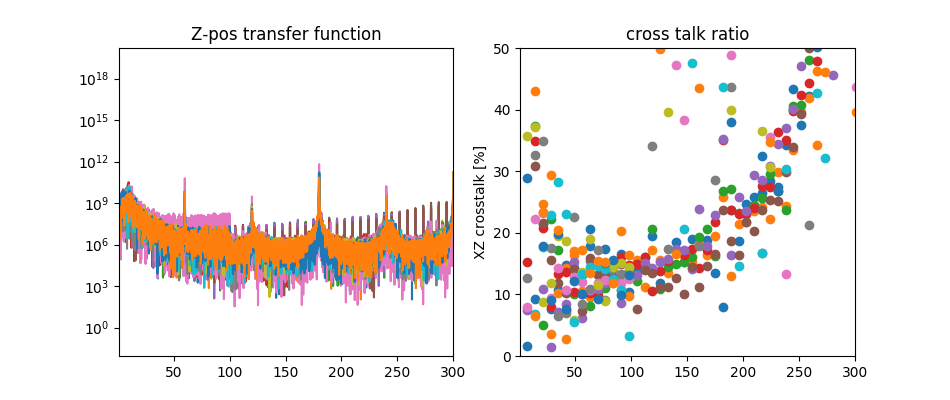

In [105]:
xtalk = []
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
for i in range(0,12):
    freq, psd_tx = bdfs_x[i].psd2('z')
    freq, psd_tz = bdfs_z[i].psd2('z')
#     ax[0].semilogy(freq, psd_tz, alpha=0.5)
    ax[0].semilogy(freq, psd_tx)

    fff = []
    ratio = []
    for ff,tx,tz in zip(freq,psd_tx,psd_tz):
        if (ff%7==0):
            fff.append(ff)
            ratio.append(np.sqrt(tx/tz)*100)
            if (ff==98):
                xtalk.append(np.sqrt(tx/tz)*100)
    ax[1].scatter(fff,ratio)
    ax[0].set(xlim=(1,300),title='Z-pos transfer function')
    ax[1].set(ylim=(0,50), title='cross talk ratio', ylabel='XZ crosstalk [%]')

In [48]:
len(xtalk), len(pos_z)

(12, 12)

<IPython.core.display.Javascript object>


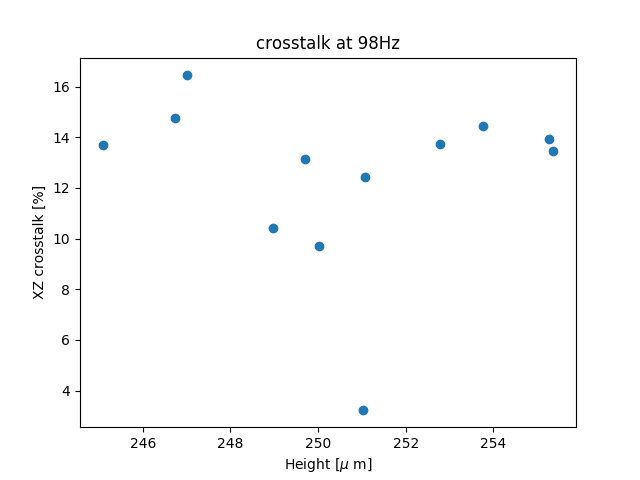

[Text(0, 0.5, 'XZ crosstalk [%]'),
 Text(0.5, 0, 'Height [$\\mu$ m]'),
 Text(0.5, 1.0, 'crosstalk at 98Hz')]

In [107]:
_, ax = plt.subplots()
ax.scatter(pos_z, xtalk)
ax.set(ylabel='XZ crosstalk [%]', xlabel='Height [$\mu$ m]', title='crosstalk at 98Hz')

### Z response

In [57]:
bdf_response = load_dir(dirname='/data/new_trap/20200226/Bead1/Response/')

301  files in folder
301  files loaded


In [61]:
bb = bdf_response[0]
resp_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_response]
height_z = [bb.bead_height for bb in  bdf_response]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [68]:
height_z2 = [250.00904093, 249.54678686, 249.86204592, 250.11730852,       249.67477644, 249.08215915, 249.77727401, 249.98061589,       249.44673233, 249.46984158, 249.34411897, 250.02309544,       248.85527872, 248.7630554 , 249.18987765, 249.82781199,       250.42157634, 249.49882497, 249.42300877, 249.47552451,       249.35246544, 250.01881887, 249.96858198, 249.72034443,       250.07310584, 249.90034825, 250.12588182, 249.31030649,       249.26685398, 250.07809699, 249.47208301, 249.83406162,       249.2310754 , 249.65167459, 249.80813279, 248.4233985 ,       251.13560592, 248.76073283, 249.50536839, 248.83788729,       249.02815315, 249.41866017, 249.47257822, 248.52849742,       248.55454164, 249.22474679, 249.34917203, 248.86746725,       249.21706066, 249.19107609, 249.65184784, 249.36319133,       249.33377064, 249.5871772 , 249.63554382, 248.81291788,       249.82366109, 249.48331142, 249.2810903 , 248.66896927,       248.72496764, 248.86217884, 249.5509051 , 248.83133221,       249.37989082, 249.5716362 , 250.10868727, 249.9003771 ,
       248.78292079, 248.68297726, 249.31752702, 248.30058668,       249.62386186, 249.60875308, 249.24847178, 249.49575462,       249.54214802, 249.49503404, 248.95018751, 248.86055744,       249.64792931, 249.27221184, 249.40292727, 248.65278762,       248.74859437, 248.92930813, 250.01885106, 248.85456615,       249.4904577 , 250.64908272, 249.27617231, 249.49915927,       249.49660232, 248.19726611, 250.19469144, 249.55868288,       248.95081052, 249.25837717, 249.03001393, 248.57267193,       249.4442756 , 249.85811608, 249.10249051, 249.49445793,       249.19043189, 249.34300227, 250.49019761, 249.96661684,       249.44826932, 249.13406588, 248.99198548, 250.01805203,       248.98074647, 249.10488422, 248.88008515, 249.34327554,       249.6158538 , 248.8333567 , 248.95029879, 249.70542078,       248.62554275, 249.16562271, 248.87809976, 249.20043232,       249.455867  , 248.7811875 , 249.02231456, 249.49486687,       249.21371061, 249.39894877, 249.47446009, 249.06617909,       248.28931358, 248.95868386, 248.76147168, 248.50751295,       249.53198787, 249.20026145, 249.29805676, 248.18637065,       248.79187458, 249.38094469, 249.13100592, 249.63960294,
       248.68308734, 249.65884803, 249.08047387, 248.8567843 ,       249.08352935, 249.77628448, 248.97736369, 249.51156607,       249.76686729, 249.22990115, 249.49604861, 248.67083854,       249.22172059, 248.9449067 , 249.7660062 , 248.67088279,       249.3609665 , 248.96709826, 249.75780537, 249.37095184,       249.21888238, 249.01172607, 249.56691186, 249.41203372,       249.75376564, 250.09491289, 249.77684326, 249.19695114,       249.04773391, 249.6068369 , 248.74145993, 249.14261668,       248.99582561, 250.27510228, 249.98180465, 248.53499392,       249.39877596, 248.79796435, 249.6292846 , 249.08023063,       249.19310342, 248.97135841, 248.79114525, 249.19924383,       249.57884311, 249.50397095, 249.10952107, 250.11903566,       249.08936679, 249.19125522, 249.69647724, 249.29701405,       249.52853347, 249.13275885, 249.50408847, 249.13907967,       248.83250254, 249.02042805, 249.00701179, 248.29440396,       249.11980221, 249.43181004, 248.68680846, 249.06379345,       249.86879817, 249.13219039, 249.52118094, 248.83599584,       249.70058976, 249.43460577, 248.7428094 , 248.64601871,       248.56622334, 248.97757363, 249.1592175 , 248.50840659,       249.73311468, 249.66820707, 249.39223651, 249.07927007,
       248.97243463, 249.18451876, 249.42581268, 249.11054298,       248.80002543, 249.3769929 , 249.64550256, 249.61737989,       249.48594835, 250.154643  , 249.21037777, 249.45289725,       249.27977151, 248.52142485, 248.58853635, 249.11544376,       248.83023213, 248.8072064 , 249.22481275, 249.54564524,       249.68348826, 248.92803087, 249.07957771, 249.29336045,       249.30059959, 248.53270855, 248.75313272, 248.88966564,       249.95971577, 249.57397434, 249.02266093, 248.85364244,       248.74638286, 249.39155638, 249.0184965 , 248.82913094,       250.15744839, 248.73832727, 250.20927714, 249.00565174,       248.6287114 , 249.04503234, 249.1327509 , 248.92798205,       249.11025832, 249.1850142 , 249.87958263, 249.14855654,       248.83945287, 248.60207159, 248.69392353, 248.37674688,       249.59410526, 248.38366793, 249.08105931, 249.57373105,       248.37526353, 249.68554141, 248.27948421, 249.00091409,       249.09703453, 248.94213701, 249.42740318, 247.86555763,       249.35580886, 249.3699329 , 249.25363051, 248.35253625,
       249.36594758, 249.35651709, 249.54568793, 249.30702978,       247.87837574, 249.51547399, 249.2846994 , 249.20870424,       250.33491497]

<IPython.core.display.Javascript object>


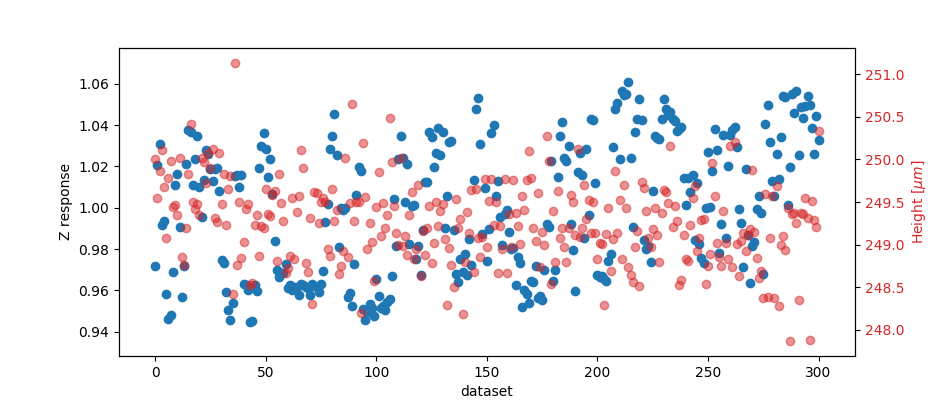

In [109]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(301), resp_z/np.mean(resp_z))
ax.set(ylabel='Z response', xlabel='dataset')

ax2 = ax.twinx()
color = 'tab:red'
ax2.scatter(range(301), height_z2, color=color, alpha=0.5)
# ax2.scatter(range(301), height_z, color=color, alpha=0.5)
ax2.set_ylabel('Height [$\mu m$]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

### Discharge

In [76]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200226/Bead1/Discharge/')

91  files in folder
91  files loaded


In [111]:
bb = bdf_response[0]
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]
dis_x = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge]
height_z3 = [bb.bead_height for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


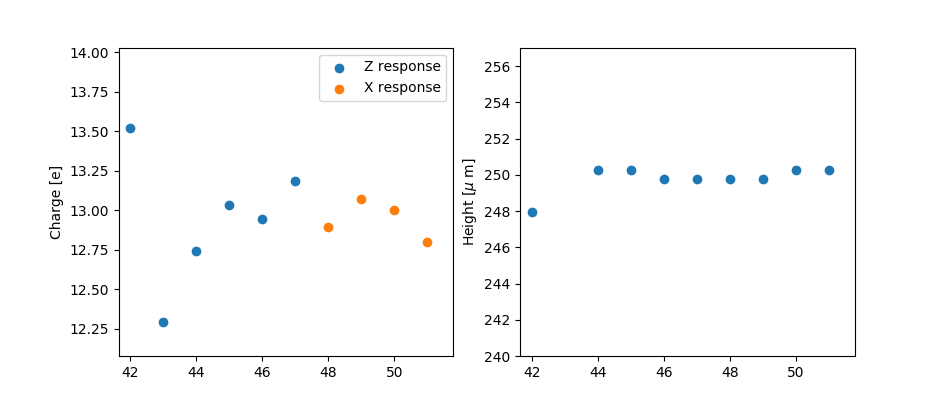

In [121]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].scatter(range(91), dis_z/dis_z[79], label='Z response')
ax[0].scatter(range(91), dis_x/dis_x[50]*13, label='X response')
ax[1].scatter(range(91), height_z3)
ax[0].set(xlim=(38,None), ylim=(0,15), ylabel='Charge [e]')
ax[1].set(xlim=(38,None), ylim=(240,257), ylabel='Height [$\mu$ m]')
ax[0].legend()

### Crosstalk

In [124]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [180]:
bdf_z = bdf_discharge[44:48]
bdf_x = bdf_discharge[48:53]
m1s_z = gfw.build_z_response(bdf_z, drive_freq=71,charges=13, bandwidth=2, decimate=100, include_sigma=False)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=71,charges=13, bandwidth=2, decimate=100)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  3.78e+03
reduced chi2:  4508.738370786036
***************************************************
Z2-amplitude:  3.87e+03
reduced chi2:  6199.230566294556
***************************************************
Z2-amplitude:  3.83e+03
reduced chi2:  6457.660291667214
***************************************************
Z2-amplitude:  3.93e+03
reduced chi2:  7219.321151755275
Z2 response (amplitude): 3854.1137226501196
***************************************************
X2-amplitude:  5.77e+01
reduced chi2:  1.2343547115776499
***************************************************
X2-amplitude:  5.84e+01
reduced chi2:  0.7482376251828428
***************************************************
X2-amplitude:  5.81e+01
reduced chi2:  1.14425487524474
***************************************************
X2-amplitude:  5.72e+01
reduced chi2:  0.7531713577272863
***************************************************
X2-amplitude:  5.77e+01
reduce

In [133]:
## fake transfer functions due to the noise in the current measurement
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_X_3.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Y_3.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]
gfw.build_transfer_function(tf_list, plot=False)

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


In [266]:
# Normal feedback values
foldername = r'/data/new_trap/20200226/Bead1/Shaking/Shaking385/'
datasets_num = 10
data_bdfs0 = load_dir(foldername, file_prefix='Shaking0', start_file=0, max_file=datasets_num)

1000  files in folder
10  files loaded


<IPython.core.display.Javascript object>


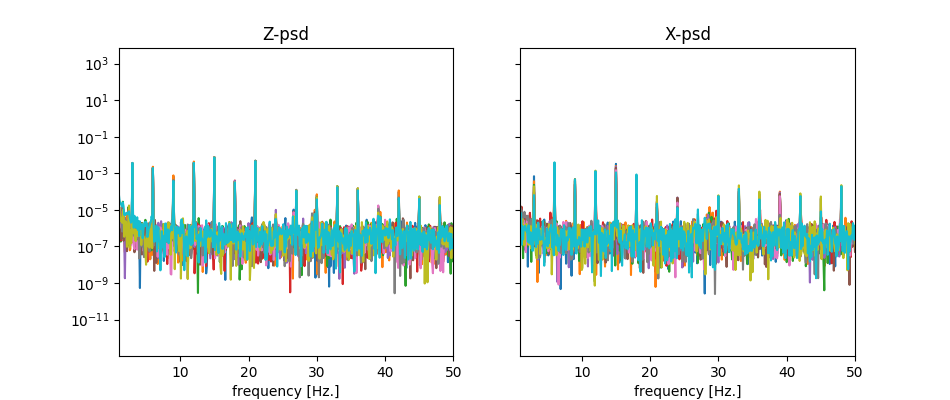

[(1, 50), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'X-psd')]

In [269]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
for i,bb in enumerate(data_bdfs[990:]):
    ax[0].semilogy(*bb.psd2('x'))
ax[0].set(xlim=(1,300),xlabel='frequency [Hz.]', title='Z-psd')

for i,bb in enumerate(data_bdfs0[:10]):
    ax[1].semilogy(*bb.psd2('x'),)
ax[1].set(xlim=(1,50),xlabel='frequency [Hz.]', title='X-psd')

<IPython.core.display.Javascript object>


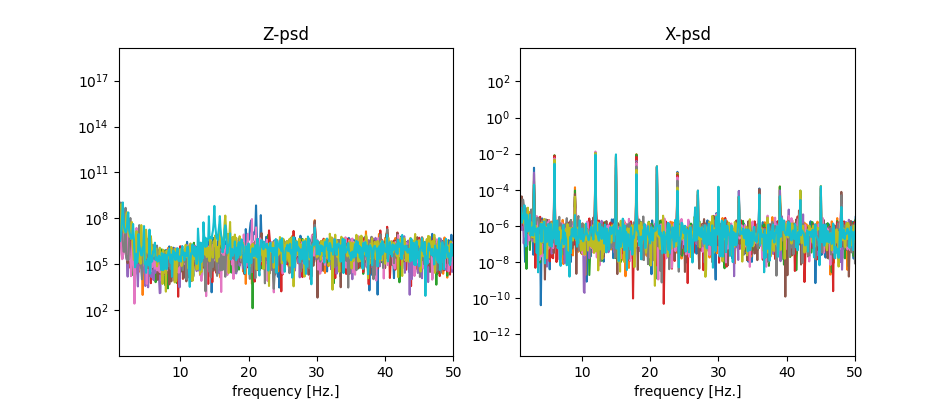

[(1, 50), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'X-psd')]

In [265]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for i,bb in enumerate(data_bdfs[::100]):
    ax[0].semilogy(*bb.psd2('z'))
ax[0].set(xlim=(1,300),xlabel='frequency [Hz.]', title='Z-psd')

for i,bb in enumerate(data_bdfs[::100]):
    ax[1].semilogy(*bb.psd2('x'),)
ax[1].set(xlim=(1,50),xlabel='frequency [Hz.]', title='X-psd')

In [221]:
gfw.BDFs = data_bdfs
gfw.build_noise_array(sideband_freq=20, bandwidth=2)
gfw.build_noise_array_z(sideband_freq=20, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.8544577112871306
x3 noise rms:  1.3457870375842453
z2 noise level:  29.789051289103504  std:  15.759232398004771


In [244]:
fit_kwargs2 = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.001, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-5,5], 'limit_sigma': [0,100],
              'fix_alpha': False, 'fix_phase': False, 'fix_sigma': False, 'print_level': 0}
min_28_z_fb1 = []
datasets_num = 1000
bandwidth = 2
center_freq = 28
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num) 
    min_28_z_fb1.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq+bandwidth, 
                                             bandwidth=bandwidth, decimate=100, direction1='z',
                          x_focous=394.5, frequency=7, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs2)[2])

0 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.67e-03
sigma mle:  3.94e+01
reduced chi2:  0.13364958647949665
1 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.79e-02
sigma mle:  3.22e+01
reduced chi2:  0.12764538903088543
2 / 1000
Separation (face to face

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha mle:  6.78e-03
sigma mle:  3.22e+01
reduced chi2:  0.12713376514768054
5 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.58e-03
sigma mle:  4.13e+01
reduced chi2:  0.13508060191947804
6 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
**********************************

***************************************************
alpha mle:  -3.08e-03
sigma mle:  3.24e+01
reduced chi2:  0.12735198599835573
25 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -6.69e-03
sigma mle:  3.86e+01
reduced chi2:  0.1328742082679536
26 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.15e-02
sigma mle:  3.83e+01
reduced chi2:  0.13263764388607244
45 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  5.16e-03
sigma mle:  2.96e+01
reduced chi2:  0.12443336779159825
46 / 1000
Separation (face to face):  6.5

***************************************************
alpha mle:  -1.07e-02
sigma mle:  3.39e+01
reduced chi2:  0.12872980011848972
67 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.74e-03
sigma mle:  3.33e+01
reduced chi2:  0.12813987040961256
68 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -1.37e-02
sigma mle:  4.96e+01
reduced chi2:  0.1409014694795102
87 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.99e-03
sigma mle:  4.79e+01
reduced chi2:  0.13981972463304526
88 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  8.69e-03
sigma mle:  5.31e+01
reduced chi2:  0.14310504815191544
104 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -7.52e-03
sigma mle:  5.14e+01
reduced chi2:  0.14205355334950262
105 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -5.29e-03
sigma mle:  5.19e+01
reduced chi2:  0.14237864009743254
126 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -5.23e-03
sigma mle:  4.22e+01
reduced chi2:  0.13574550817852993
127 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -5.28e-03
sigma mle:  4.11e+01
reduced chi2:  0.13490989449562915
144 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.15e-02
sigma mle:  4.90e+01
reduced chi2:  0.1405723371188569
145 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  1.54e-02
sigma mle:  4.97e+01
reduced chi2:  0.14096944127939215
164 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.38e-03
sigma mle:  5.07e+01
reduced chi2:  0.14200673997645366
165 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -5.10e-03
sigma mle:  4.36e+01
reduced chi2:  0.13680154953149104
181 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.87e-02
sigma mle:  4.57e+01
reduced chi2:  0.13833948203506272
182 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -4.52e-03
sigma mle:  3.53e+01
reduced chi2:  0.13000712822924068
200 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.55e-03
sigma mle:  3.61e+01
reduced chi2:  0.1307523413596823
201 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -2.23e-02
sigma mle:  4.32e+01
reduced chi2:  0.13652555146539327
220 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -7.30e-03
sigma mle:  4.85e+01
reduced chi2:  0.1401949238058367
221 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -4.85e-03
sigma mle:  4.07e+01
reduced chi2:  0.1346256614301991
240 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.90e-03
sigma mle:  4.54e+01
reduced chi2:  0.13806602177349198
241 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -6.41e-03
sigma mle:  3.99e+01
reduced chi2:  0.13398340696718852
259 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.34e-02
sigma mle:  3.32e+01
reduced chi2:  0.12809626009929234
260 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -5.70e-03
sigma mle:  2.84e+01
reduced chi2:  0.1230429385763098
280 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -9.62e-03
sigma mle:  3.63e+01
reduced chi2:  0.13091427559300353
281 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.04e-02
sigma mle:  4.01e+01
reduced chi2:  0.13412128790667072
300 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.43e-02
sigma mle:  4.78e+01
reduced chi2:  0.13977057388924477
301 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.77e-03
sigma mle:  4.75e+01
reduced chi2:  0.1395258960285757
320 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -6.38e-03
sigma mle:  4.32e+01
reduced chi2:  0.13650772309253936
321 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  2.07e-02
sigma mle:  5.60e+01
reduced chi2:  0.1450012923352925
339 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.05e-02
sigma mle:  4.43e+01
reduced chi2:  0.13734594607139597
340 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  3.18e-02
sigma mle:  3.45e+01
reduced chi2:  0.12928624969624125
358 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.64e-02
sigma mle:  3.34e+01
reduced chi2:  0.12830185969057634
359 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.08e-02
sigma mle:  5.09e+01
reduced chi2:  0.14172717518147845
379 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.38e-02
sigma mle:  5.04e+01
reduced chi2:  0.14143893217035938
380 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.50e-02
sigma mle:  4.65e+01
reduced chi2:  0.1388425992115119
399 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.03e-02
sigma mle:  3.23e+01
reduced chi2:  0.1271562680596868
400 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
********************************

***************************************************
alpha mle:  -6.19e-03
sigma mle:  5.07e+01
reduced chi2:  0.14165295639922074
419 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.36e-02
sigma mle:  4.81e+01
reduced chi2:  0.13992525820014456
420 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.31e-02
sigma mle:  5.13e+01
reduced chi2:  0.14202500166099932
438 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.34e-02
sigma mle:  3.67e+01
reduced chi2:  0.13129801986539497
439 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  1.22e-02
sigma mle:  3.34e+01
reduced chi2:  0.12830847626115893
458 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -6.61e-03
sigma mle:  3.50e+01
reduced chi2:  0.12974917845413286
459 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.80e-03
sigma mle:  4.15e+01
reduced chi2:  0.1352107330830574
478 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.40e-02
sigma mle:  4.24e+01
reduced chi2:  0.13630858310164146
479 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not ex

***************************************************
alpha mle:  1.47e-02
sigma mle:  5.11e+01
reduced chi2:  0.14186362044996112
499 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -9.48e-03
sigma mle:  4.34e+01
reduced chi2:  0.13667560435157067
500 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -9.53e-03
sigma mle:  4.93e+01
reduced chi2:  0.1407354186707209
519 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.36e-03
sigma mle:  4.90e+01
reduced chi2:  0.1405698335630889
520 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -1.84e-02
sigma mle:  4.25e+01
reduced chi2:  0.13597433633159675
540 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.14e-02
sigma mle:  3.10e+01
reduced chi2:  0.12537974151872688
541 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  4.90e-03
sigma mle:  3.78e+01
reduced chi2:  0.13222406283173402
560 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.05e-02
sigma mle:  3.77e+01
reduced chi2:  0.13212126105808011
561 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  6.38e-03
sigma mle:  4.46e+01
reduced chi2:  0.13756449558051936
579 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.06e-02
sigma mle:  4.31e+01
reduced chi2:  0.13644059870875683
580 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  2.05e-02
sigma mle:  3.57e+01
reduced chi2:  0.13038404519018668
599 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.82e-02
sigma mle:  4.02e+01
reduced chi2:  0.13423505114046322
600 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -1.59e-02
sigma mle:  3.90e+01
reduced chi2:  0.13324372744076898
619 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.28e-02
sigma mle:  4.34e+01
reduced chi2:  0.1366690695841555
620 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -6.14e-03
sigma mle:  4.19e+01
reduced chi2:  0.13551009463708755
640 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.36e-02
sigma mle:  4.02e+01
reduced chi2:  0.13418346032579895
641 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.53e-02
sigma mle:  5.01e+01
reduced chi2:  0.14127998362166724
659 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.20e-04
sigma mle:  5.17e+01
reduced chi2:  0.1422773505937012
660 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  1.17e-02
sigma mle:  4.65e+01
reduced chi2:  0.1388375952072057
680 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.43e-02
sigma mle:  4.00e+01
reduced chi2:  0.13406286879301477
681 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  -7.53e-03
sigma mle:  4.01e+01
reduced chi2:  0.13410019850185753
700 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.06e-02
sigma mle:  4.06e+01
reduced chi2:  0.13449662059452988
701 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -1.04e-02
sigma mle:  3.83e+01
reduced chi2:  0.1326216350221578
719 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.36e-03
sigma mle:  3.78e+01
reduced chi2:  0.13224911360141772
720 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -9.22e-03
sigma mle:  4.85e+01
reduced chi2:  0.14067507384602704
740 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  7.05e-03
sigma mle:  5.48e+01
reduced chi2:  0.14413921937810936
741 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not 

A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.71e-03
sigma mle:  3.67e+01
reduced chi2:  0.13125359699145323
760 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.46e-02
sigma mle:  3.68e+01
reduced chi2:  0.13134260580726842
761 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is se

2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -9.06e-03
sigma mle:  5.52e+01
reduced chi2:  0.14434098645999724
781 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.07e-02
sigma mle:  5.31e+01
reduced chi2:  0.1431256092851739
782 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-

***************************************************
alpha mle:  -1.45e-02
sigma mle:  3.09e+01
reduced chi2:  0.12574081877866036
800 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.93e-02
sigma mle:  3.52e+01
reduced chi2:  0.12999188746493326
801 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  1.44e-02
sigma mle:  3.94e+01
reduced chi2:  0.1335355064582281
820 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.83e-03
sigma mle:  4.04e+01
reduced chi2:  0.13436604470825522
821 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  -1.70e-02
sigma mle:  4.13e+01
reduced chi2:  0.1350843359636024
840 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.45e-03
sigma mle:  3.45e+01
reduced chi2:  0.12929237685138892
841 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -2.10e-02
sigma mle:  3.23e+01
reduced chi2:  0.12715173584799236
859 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.41e-03
sigma mle:  3.93e+01
reduced chi2:  0.1334852742788455
860 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.71e-02
sigma mle:  3.03e+01
reduced chi2:  0.12566283687562393
878 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.07e-02
sigma mle:  3.79e+01
reduced chi2:  0.1323096703450969
879 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -2.28e-02
sigma mle:  3.77e+01
reduced chi2:  0.13217117072330703
899 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.70e-04
sigma mle:  3.26e+01
reduced chi2:  0.12753710645690114
900 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.87e-02
sigma mle:  3.58e+01
reduced chi2:  0.13050261054824605
920 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.08e-02
sigma mle:  3.40e+01
reduced chi2:  0.12881198147550033
921 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not e

***************************************************
alpha mle:  8.71e-03
sigma mle:  3.81e+01
reduced chi2:  0.13246754846496894
940 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.07e-02
sigma mle:  3.21e+01
reduced chi2:  0.1269642869301686
941 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -2.43e-02
sigma mle:  3.23e+01
reduced chi2:  0.12722813971769115
959 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.46e-02
sigma mle:  3.55e+01
reduced chi2:  0.1302060758853563
960 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  3.77e-02
sigma mle:  3.37e+01
reduced chi2:  0.1285161492534738
980 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.40e-03
sigma mle:  2.75e+01
reduced chi2:  0.12211163792469445
981 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

In [245]:
m_18_alpha_z = [m1_.values[0] for m1_ in min_18_z]
m_18_sigma_z = [m1_.values[2] for m1_ in min_18_z]

m_18_alpha_z_fb1 = [m1_.values[0] for m1_ in min_18_z_fb1]
m_18_sigma_z_fb1 = [m1_.values[2] for m1_ in min_18_z_fb1]

m_20_alpha_z_fb1 = [m1_.values[0] for m1_ in min_20_z_fb1]
m_20_sigma_z_fb1 = [m1_.values[2] for m1_ in min_20_z_fb1]

m_28_alpha_z_fb1 = [m1_.values[0] for m1_ in min_28_z_fb1]
m_28_sigma_z_fb1 = [m1_.values[2] for m1_ in min_28_z_fb1]

m_6_alpha_z = [m1_.values[0] for m1_ in min_6_z]
m_6_sigma_z = [m1_.values[2] for m1_ in min_6_z]

m_18_alpha_x_fb1 = [m1_.values[0] for m1_ in min_18_x_fb1]
m_18_sigma_x_fb1 = [m1_.values[2] for m1_ in min_18_x_fb1]

m_18_alpha_x = [m1_.values[0] for m1_ in min_18_x]
m_18_sigma_x = [m1_.values[2] for m1_ in min_18_x]

m_6_alpha_x = [m1_.values[0] for m1_ in min_6_x]
m_6_sigma_x = [m1_.values[2] for m1_ in min_6_x]

In [241]:
len(min_18_z_fb1)

1000

<IPython.core.display.Javascript object>


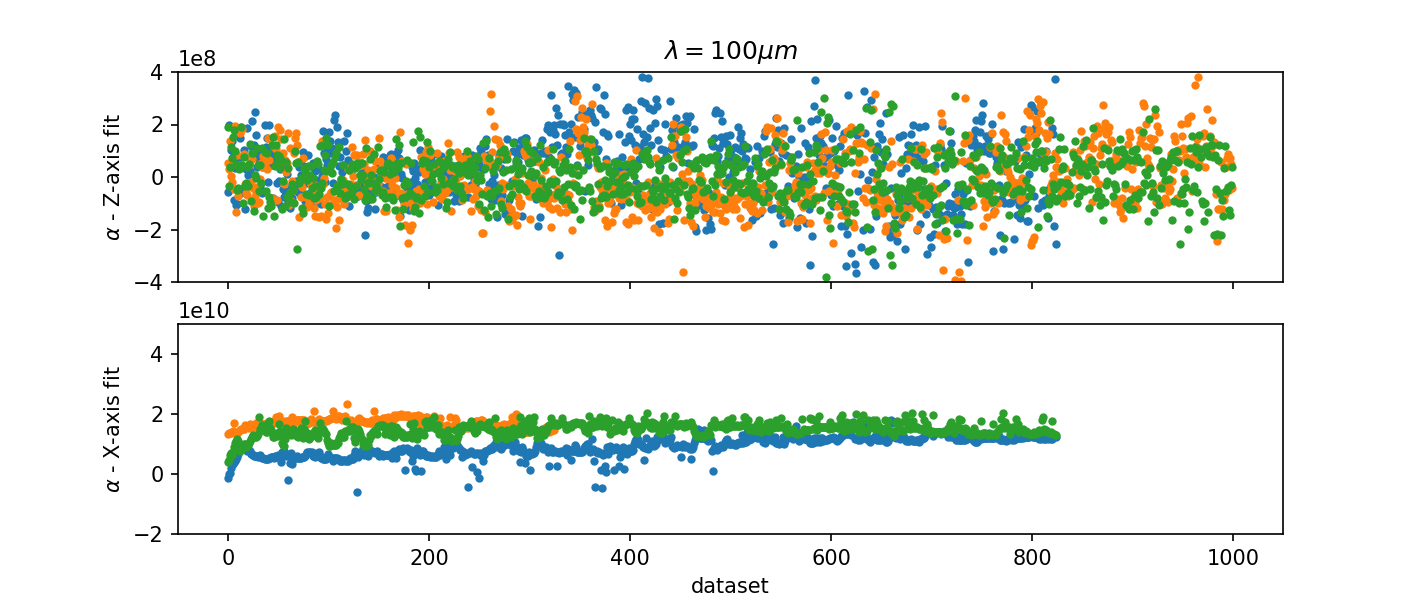

[(-20000000000.0, 50000000000.0)]

In [242]:
_, ax = plt.subplots(2,1,figsize=(9.5,4), sharex=True)
ax[0].plot(range(len(m_18_alpha_z)),np.array(m_18_alpha_z)*1e10,'.')
ax[0].plot(range(len(m_18_alpha_z_fb1)),np.array(m_18_alpha_z_fb1)*1e10,'.')
ax[0].plot(range(len(m_20_alpha_z_fb1)),np.array(m_20_alpha_z_fb1)*1e10,'.')

# ax[0].plot(range(len(m_6_alpha_z)),np.array(m_6_alpha_z)*1e10,'.')

ax[1].plot(range(len(m_18_alpha_x)),np.array(m_18_alpha_x)*1e10,'.')
ax[1].plot(range(len(m_18_alpha_x_fb1)),np.array(m_18_alpha_x_fb1)*1e10,'.')
ax[1].plot(range(len(m_6_alpha_x)),np.array(m_6_alpha_x)*1e10,'.')

# ax.plot(range(len(m_18_alpha)),np.array(m_6_alpha),'.')
# ax.plot(range(len(m_18_alpha)),np.array(m_6_alpha_x-np.mean(m_6_alpha_x))/10,'.')

ax[1].set(xlabel='dataset', ylabel=r'$\alpha$ - X-axis fit')
ax[0].set(ylabel=r'$\alpha$ - Z-axis fit', title=r'$\lambda=100 \mu m $')
ax[0].set(ylim=(-4e8,4e8))
ax[1].set(ylim=(-2e10,5e10))

<IPython.core.display.Javascript object>


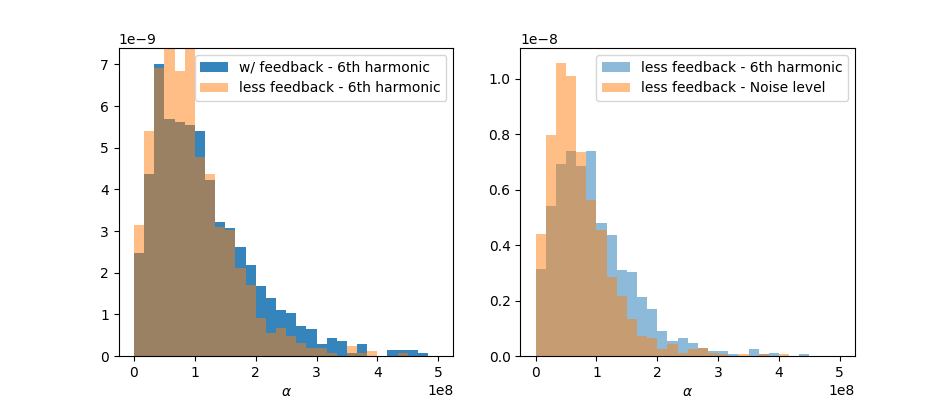

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


[[Text(0.5, 0, '$\\alpha$')], [Text(0.5, 0, '$\\alpha$')]]

In [264]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.abs(m_18_alpha_z)*1e10,range=(0,0.05*1e10),bins=30,alpha=0.9,normed=True, label='w/ feedback - 6th harmonic')
ax[0].hist(np.abs(m_18_alpha_z_fb1)*1e10,range=(0,0.05*1e10),bins=30,alpha=0.5,normed=True, label='less feedback - 6th harmonic')
ax[1].hist(np.abs(m_18_alpha_z_fb1)*1e10,range=(0,0.05*1e10),bins=30,alpha=0.5,normed=True, label='less feedback - 6th harmonic')
ax[1].hist(np.abs(m_20_alpha_z_fb1)*1e10,range=(0,0.05*1e10),bins=30,alpha=0.5,normed=True, label='less feedback - Noise level')
[a.legend() for a in ax]
[a.set(xlabel=r'$\alpha$') for a in ax]